<a href="https://colab.research.google.com/github/pavanreddy00091/new-repository/blob/main/CHENNAI_HOUSE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM STATEMENT:

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

MINIMUM REQUIREMENTS:

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

In [ ]:
\import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/train-chennai-sale.csv")
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
# checking number of col and and rows
data.shape

(7109, 22)

In [ ]:
#dropping unncessary columns
data = data.drop(columns = ['REG_FEE'])
data = data.drop(columns = ['COMMIS'])
data = data.drop(columns = ['PRT_ID'])

In [ ]:
# checking null values
data.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [ ]:
data.head(1)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.33,7600000


In [ ]:
# data["N_BATHROOM"].fillna(data["N_BATHROOM"].mode,inplace = True)

In [ ]:
# data.N_BATHROOM.astype(float)

In [ ]:
data["N_BATHROOM"].mode()

0    1.0
dtype: float64

In [ ]:
data.N_BATHROOM = data.N_BATHROOM.replace({np.nan:1.0})

In [ ]:
data["QS_OVERALL"].mean()

3.5032537884152344

In [ ]:
data.QS_OVERALL = data.QS_OVERALL.replace({np.nan:3.50})

In [ ]:
data["QS_OVERALL"].dtypes

dtype('float64')

In [ ]:
# dropping entire rows whicha has null values
data = data.dropna()


In [ ]:
data.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

In [ ]:
# converting to datatime format
import datetime as dt
data["DATE_SALE"] = pd.to_datetime(data["DATE_SALE"], format='%d-%m-%Y')
data["DATE_BUILD"] =  pd.to_datetime(data["DATE_BUILD"], format='%d-%m-%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# calculating age of building and creating column as AGE
data['AGE'] = (data['DATE_SALE'].dt.year - data['DATE_BUILD'].dt.year).astype(int)
data.loc[data['DATE_SALE'].dt.month < data['DATE_BUILD'].dt.month, 'AGE'] = data['AGE'] - 1
data.loc[(data['DATE_SALE'].dt.month == data['DATE_BUILD'].dt.month) & (data['DATE_SALE'].dt.day < data['DATE_BUILD'].dt.day), 'AGE'] = data['AGE'] - 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#dropping columns
data = data.drop(columns = ['DATE_BUILD'])
data = data.drop(columns = ['DATE_SALE'])

## Checking spelling mistakes in each column and correcting 


In [ ]:
data["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
data.AREA = data.AREA.replace({'Karapakam':"Karapakkam"})
data.AREA = data.AREA.replace({"Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar"})
data.AREA = data.AREA.replace({'Chrompet':"Chromepet","Chrompt":'Chromepet',"Chormpet":"Chromepet","Chrmpet":"Chromepet"})
data.AREA = data.AREA.replace({'Adyr':"Adyar"})
data.AREA = data.AREA.replace({'Velchery':"Velachery"})
data.AREA = data.AREA.replace({'KK Nagar':"K. K. Nagar","KKNagar":"K. K. Nagar"})
data.AREA = data.AREA.replace({'TNagar':"T. Nagar","TNagar":"T. Nagar","T Nagar":"T. Nagar"})

In [ ]:
data["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
data.PARK_FACIL = data.PARK_FACIL.replace({'Noo':"No"})

In [ ]:
data["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
data.SALE_COND = data.SALE_COND.replace({'AbNormal':"Abnormal",'Ab Normal':"Abnormal",'Adj Land':"AdjLand",'PartiaLl':"Partial",'Partiall':"Partial"})

In [ ]:
data["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
data.BUILDTYPE = data.BUILDTYPE.replace({'Comercial':"Commercial",'Other':"Others"})

In [ ]:
data["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.replace({'All Pub':"AllPub",'NoSewr ':'NoSewr'})

In [ ]:
data["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
data.STREET = data.STREET.replace({'Pavd':'Paved',"NoAccess":"No Access"})

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,Abnormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,43
1,Anna Nagar,1986,26,2.0,1.0,5,Abnormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,10
2,Adyar,909,70,1.0,1.0,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,19
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,21
4,Karapakkam,1226,84,1.0,1.0,3,Abnormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,29


## Checking for outliers 

In [ ]:
data.INT_SQFT.describe()

count    7108.000000
mean     1382.048537
std       457.438429
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [ ]:
data.N_BEDROOM.describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [ ]:
data.N_ROOM.describe()

count    7108.000000
mean        3.688661
std         1.019164
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

From these we found that, there are no outliers


## Checking corelation between all the columns

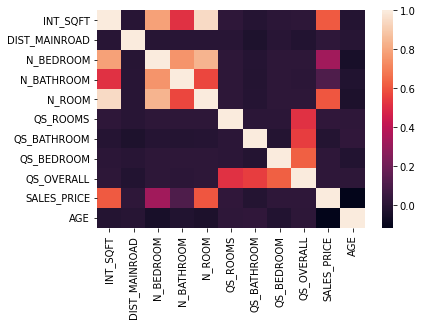

In [ ]:
sns.heatmap(data.corr())

## EDA

Text(0.5, 1.0, 'Number of sales in each area')

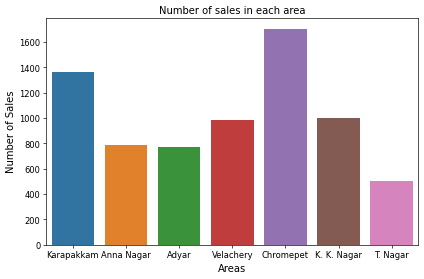

In [ ]:

a = data["AREA"].value_counts(sort=False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Areas", fontsize = 12)
b.set_ylabel("Number of Sales", fontsize = 12)
b.set_title("Number of sales in each area")

From above graph we conclude that Karapakkam has more number of sales

Text(0.5, 1.0, 'Number of Yes and No')

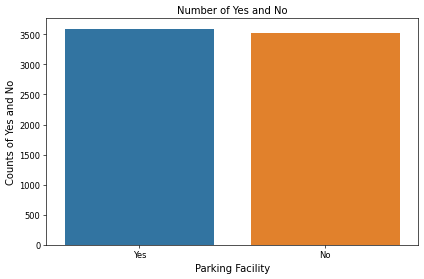

In [ ]:
a = data["PARK_FACIL"].value_counts(sort = False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Parking Facility", fontsize = 12)
b.set_ylabel("Counts of Yes and No", fontsize = 12)
b.set_title("Number of Yes and No")

From the above graph, we will know that most of sale property have parking facility

Text(0.5, 1.0, 'Number of Public facilities')

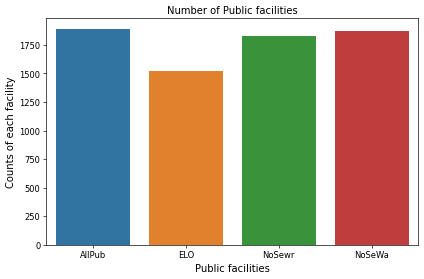

In [ ]:
a = data["UTILITY_AVAIL"].value_counts(sort = False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Public facilities", fontsize = 12)
b.set_ylabel("Counts of each facility", fontsize = 12)
b.set_title("Number of Public facilities")

From the above graph,we will know that most properties have all the puplic facitities

Text(0.5, 1.0, 'Counts of building types')

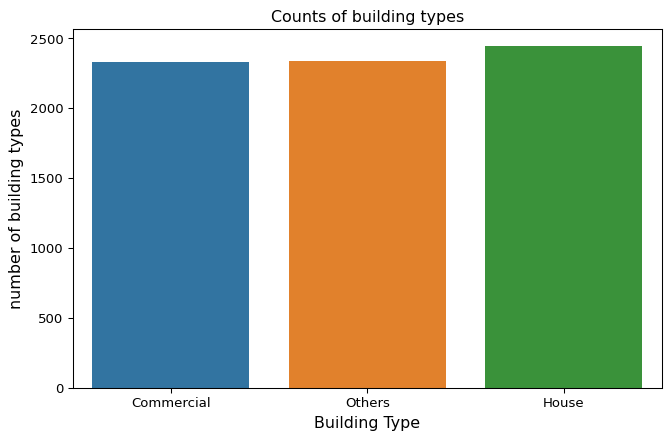

In [ ]:
a = data["BUILDTYPE"].value_counts(sort = False)
fig=plt.figure(figsize=(8,5),dpi=95)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Building Type", fontsize = 12)
b.set_ylabel("number of building types", fontsize = 12)
b.set_title("Counts of building types")

From above graph we will know that most of sale properties are Houses, followed by others and commercial

Text(0.5, 1.0, 'Number of counts in each type of street')

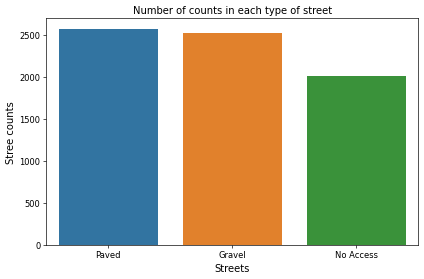

In [ ]:

a = data["STREET"].value_counts(sort=False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Streets", fontsize = 12)
b.set_ylabel("Stree counts", fontsize = 12)
b.set_title("Number of counts in each type of street")

From the above graph, we conclude that most of the propeties have paved street follwed bt gravel

Text(0.5, 1.0, 'Number of SALE_COND')

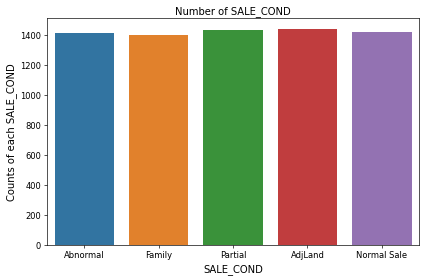

In [ ]:
a = data["SALE_COND"].value_counts(sort = False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("SALE_COND", fontsize = 12)
b.set_ylabel("Counts of each SALE_COND", fontsize = 12)
b.set_title("Number of SALE_COND")

From the above graph, we conclude that AdjLand sale condition  has more number of properties and family has least

## Relationship between features and target

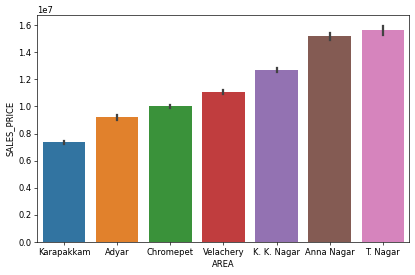

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.barplot(x = data.AREA, y = data.SALES_PRICE, order = data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

From the graph we will conclude, different areas have different sales price and T.Nagar has highest price and we found that linear relationship betweem area and sale price

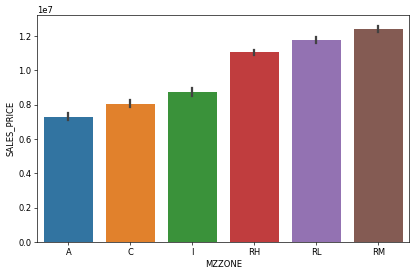

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.barplot(x = data.MZZONE, y = data.SALES_PRICE, order = data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

From the above figure, we interprete that RM zone has more sales price

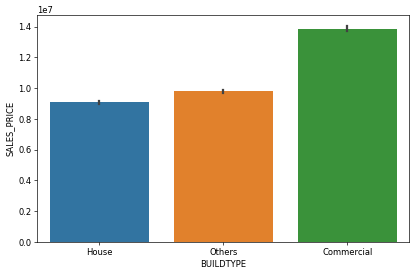

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.barplot(x = data.BUILDTYPE, y = data.SALES_PRICE, order = data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

From the above graph, we will know that commercial buildings have more sales prices compared house and others

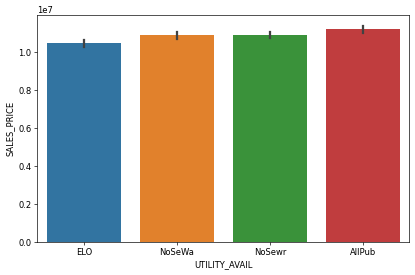

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.barplot(x = data.UTILITY_AVAIL, y = data.SALES_PRICE, order = data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

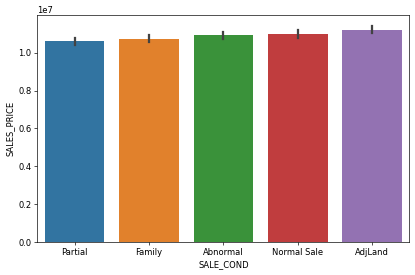

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.barplot(x = data.SALE_COND, y = data.SALES_PRICE, order = data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

From the above graph, we will know that AdjLand more sale price and Partial has less sale price

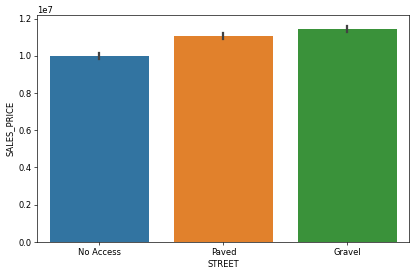

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.barplot(x = data.STREET, y = data.SALES_PRICE, order = data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

From the above graph, we know that Gravel street has more sales compared to other kind of streets

In [ ]:
data.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,Abnormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,43
1,Anna Nagar,1986,26,2.0,1.0,5,Abnormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,10


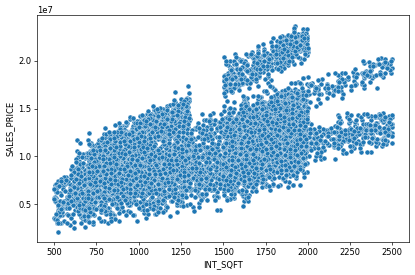

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.scatterplot(data=data, x="INT_SQFT", y="SALES_PRICE")

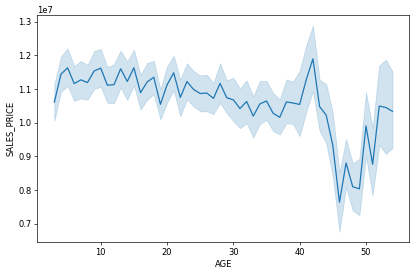

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.lineplot(data=data, x="AGE", y="SALES_PRICE")

From the above figure we will know that, as the age of building increases the sale price decreses

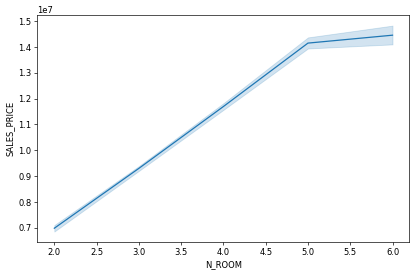

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.lineplot(data=data, x="N_ROOM", y="SALES_PRICE")

From the above figure we will know that, as the total number of rooms of building increases the sale price decreses

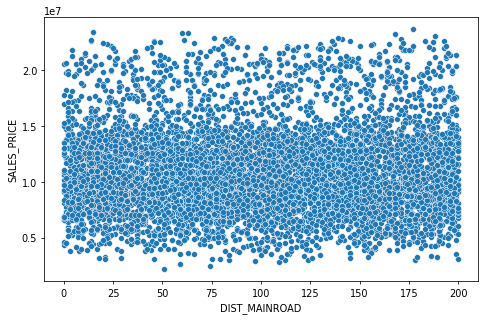

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=70)
sns.scatterplot(data=data, x="DIST_MAINROAD", y="SALES_PRICE")

From the above graph, we do not find any kind of relationship 


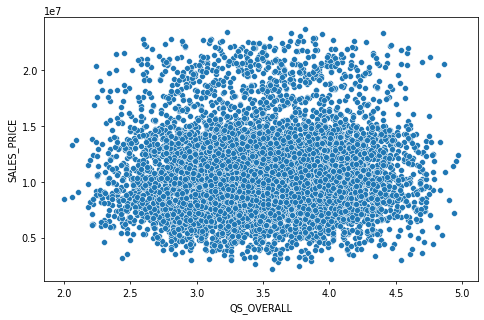

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=70)
sns.scatterplot(data=data, x="QS_OVERALL", y="SALES_PRICE")

From the above graph, we do not find any kind of relationship 

In [ ]:
data = data.drop(columns = ['QS_OVERALL'])
data = data.drop(columns = ['DIST_MAINROAD'])

## ENCODING

Encoding for AREA column (Label Encoding)

In [ ]:
data["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chromepet',
       'K. K. Nagar', 'T. Nagar'], dtype=object)

In [ ]:
data.AREA = data.AREA.map({'Karapakkam':0,"Adyar":1,"Chromepet":2,"Velachery":3,"K. K. Nagar":4,"Anna Nagar":5,"T. Nagar":6})

In [ ]:
data["AREA"].unique()

array([0, 5, 1, 3, 2, 4, 6])

Encoding for SALE_COND (label)

In [ ]:
data["SALE_COND"].unique()

array(['Abnormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
data.SALE_COND = data.SALE_COND.map({"Partial":0,"Family":1,"Abnormal":2,"Normal Sale":3,"AdjLand":4})

In [ ]:
data["SALE_COND"].unique()

array([2, 1, 0, 4, 3])

Encoding for PARK_FACIL (label)

In [ ]:
data["PARK_FACIL"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data.PARK_FACIL = data.PARK_FACIL.map({'Yes':1,'No':0})

In [ ]:
data["PARK_FACIL"].unique()

array([1, 0])

Encoding for BUIDTYPE (one hot)

In [ ]:
data["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
data.BUILDTYPE = data.BUILDTYPE.map({'House':0,'Others':1,'Commercial':3})

In [ ]:
# ol = pd.get_dummies(data["BUILDTYPE"])
# data = data.drop("BUILDTYPE",axis=1)
# data = data.join(ol)

In [ ]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,SALES_PRICE,AGE
0,0,1004,1.0,1.0,3,2,1,3,AllPub,Paved,A,4.0,3.9,4.9,7600000,43
1,5,1986,2.0,1.0,5,2,0,3,AllPub,Gravel,RH,4.9,4.2,2.5,21717770,10
2,1,909,1.0,1.0,3,2,1,3,ELO,Gravel,RL,4.1,3.8,2.2,13159200,19
3,3,1855,3.0,2.0,5,1,0,1,NoSewr,Paved,I,4.7,3.9,3.6,9630290,21
4,0,1226,1.0,1.0,3,2,1,1,AllPub,Gravel,C,3.0,2.5,4.1,7406250,29


Encoding for UTILITY_AVAIL (label)

In [ ]:
data["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [ ]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.map({'ELO':0,'NoSeWa':1,'NoSewr':1,"AllPub":2})

In [ ]:
data["UTILITY_AVAIL"].unique()

array([2, 0, 1])


Encoding for STREET (label)

In [ ]:
data["STREET"].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
data.STREET = data.STREET.map({'No Access':0,'Paved':1,'Gravel':2})

In [ ]:
data["STREET"].unique()

array([1, 2, 0])

Encoding for MZZONE (label)

In [ ]:
data["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
data.MZZONE = data.MZZONE.map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})

In [ ]:
data["MZZONE"].unique()

array([0, 4, 5, 2, 1, 6])

In [ ]:
data.head(2)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,SALES_PRICE,AGE
0,0,1004,1.0,1.0,3,2,1,3,2,1,0,4.0,3.9,4.9,7600000,43
1,5,1986,2.0,1.0,5,2,0,3,2,2,4,4.9,4.2,2.5,21717770,10


In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'SALES_PRICE', 'AGE'],
      dtype='object')

## Linear Regression

In [ ]:
X = data[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'SALES_PRICE', 'AGE']].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 1.0


## Decission  tree

In [ ]:
X = data[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'SALES_PRICE', 'AGE']].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train) 
y_pred = dt.predict(X_test)

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9999758944045586


## KNN

In [ ]:
X = data[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'SALES_PRICE', 'AGE']].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(20) 
knn.fit(X_train,y_train) 
y_pred=j=knn.predict(X_test)

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9548453747769099


## Bagging (Bootstrap aggregation)

In [ ]:
X = data[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'SALES_PRICE', 'AGE']].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
model = BaggingRegressor(tree.DecisionTreeRegressor(max_depth = 1, random_state=1), n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6392215887276915


## Random Forest

In [ ]:
X = data[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'SALES_PRICE', 'AGE']].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6392215887276915


## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingRegressor 
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

In [ ]:
X = data[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'SALES_PRICE', 'AGE']].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [ ]:
model1 = LinearRegression()
model2 = tree.DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(3)
model4 = xgb.XGBRegressor(random_state=2)
model = VotingRegressor(estimators=[('lr', model1), ('dt', model2),('knn',model3),('xgb',model4)]) 

In [ ]:
model.fit(X_train,y_train) 
y_pred = model.predict(X_test)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12:08:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2- SCORE: 0.9999912061668883


## Xgboost

In [ ]:
X = data[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'SALES_PRICE', 'AGE']].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1,1.5,2,2.5]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.2742984736118219  Cross-Val score :  -0.2780555646243479
Learning rate :  0.02  Train score :  0.8301356945131879  Cross-Val score :  0.8295368989554943
Learning rate :  0.03  Train score :  0.9776702175345514  Cross-Val score :  0.9775467191413201
Learning rate :  0.04  Train score :  0.9970781422218188  Cross-Val score :  0.9970406428563434
Learning rate :  0.05  Train score :  0.9995993305665314  Cross-Val score :  0.9995813639601344
Learning rate :  0.1  Train score :  0.9999183378274262  Cross-Val score :  0.9999037493592604
Learning rate :  0.11  Train score :  0.9999024401576396  Cross-Val score :  0.999884944684285
Learning rate :  0.12  Train score :  0.9998812486995011  Cross-Val score :  0.9998679712424577
Learning rate :  0.13  Train score :  0.9998755762113358  Cross-Val score :  0.9998520867371914
Learning rate :  0.14  Train score :  0.9998678442166684  Cross-Val score :  0.9998439265427308
Learning rate :  0.15  Train score :  0.

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
model.fit(X_train,y_train) 
model.score(X_test, y_test) 

0.999934811720546

**Suggestions to Real estate agents and buyers**

Profit can be increased by considering the following factors:
:

1.It is recommended to construct a commercial bulding rather than residential or others.

2.Constructing buildings in T Nagar, Anna Nagar and KK Nagar can result in more profit.

3.It is highly recommended to construct buildings with Parking Facility. The Street of property should be Paved and it should have All Public facilites nearby.

4.Area is the Most important Feature for profitability, Area plays a crucial Role for deciding the best price of the houses. The area with more facilites will have higer price. The area with low facilites will have low price. In Chennai, T.Nagar has highest house price.

5.Buildtype is the second most important Feature for better investments. Commercial Houses are most expensive compared to normal house. Commercial buildings are hospitals, shopping malls,stores,IT companies etc., The investment of commercial building is more valuable than normal houses for the future profits.

6.As the square Footage of the house increases, the price of the house also increases. Square footage is essential for the viability of the investment.

7.Zone also plays a major role in deciding the house price. Commercial and Industrial zones are more profitable.

8.Price of the property changes due to various factors. Top factors are: Based on whether the property is Commercial,others or House Based on the location of the property. The price changes also on Availability of Parking. Finally based on the Zone which the property belongs to

**CONCLUSIONS DRAWN FROM STUDY**

1.More number of houses are sold in chrompet and karapakkam as they are more affordable

2.Houses in T.Nagar are highly expensive and sold less when compared to other housesand they are considered premium.

3.Houses in karapakkam and chrompet has more 1 and 2 bedrooms and sold more when comparing with others and its more budget friendly.

4.Houses in karapakkam , adayar and chrompet are small in size and KK Nagar has comparitively bigger houses and prices reflect it.

5.Houses with parking facilites are sold more when compared to houses with non parking facilities.

6.Commercial buildings are expensive than other type of buildings.

7.Houses with all the public facilites are sold comparively high.

8.Chrompet has highest number of houses with all the public facilities.

9.Most commercial houses are of paved street, and most house type houses has gravel street.

10.House price increases with the municipality zone.

11.Resenditial medium density zone has most expensive houses, whereas Agricultural zone has cheapest house.


                            *THANKYOU*